## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

- We aim to predict the income of individuals in 1994-1995. Our objective is to build a model that correctly classifies people as being rich (i.e. having annual income greater or equal to 50k, or 100k today adjusted for inflation) without aggressivley classifying everyone as 0s (annual income less than 50k).

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

- https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29
- We retrieved Census-Income (KDD) Data Set from UCI Machine Learning Repositary. This data set contains weighted census data extracted from the 1994 and 1995 Current Population Surveys conducted by the U.S. Census Bureau.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

- **Economic policymakers** will be among our stakeholders, recognizing the valuable insights that history provides for shaping the future. By accurately classifying affluent and impoverished populations and identifying key predictors underlying wealth disparities, our model contributes to future economic policymaking. Specifically, it assists in pinpointing underlying societal inequalities and devising effective policies to address income gaps between various social classes prevalent in contemporary societies.
- In the near future, when time machines or metaverse applications for time travel become available, another important group of stakeholders will emerge—**time travelers** aiming to maximize their chances of success by journeying back to either 1994 or 1995. Our model can play a significant role in guiding these individuals on their quest to accumulate wealth in the past.

## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

In [22]:
#| echo: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/census-income.data', header=None)
column_names=[
    'age', 'class', 'ind_code_det', 'occ_code_det', 'education', 'wage_hr', 'enroll_edu', 'marital',
    'ind_code_maj', 'occ_code_maj', 'race', 'hisp_origin', 'sex', 'lab_union', 'reason_unemp',
    'emp_status', 'cap_gain', 'cap_loss', 'dividend', 'tax_filer_stat', 'prev_res_area', 'prev_res_state',
    'fam_state', 'fam_state_sum', 'inst_weight', 'migr_change_msa', 'migr_change_reg', 'migr_move_msa', 'lived_1yr',
    'migr_sunbelt', 'num_ppl_worked', 'fam_members_u18', 'birth_dad', 'birth_mom', 'birth_self', 'citizenship',
    'employed_status', 'veteran_admin', 'veteran_benefit', 'weeks_worked', 'year', 'income']
categorical_predictors = ['sex','occ_code_det','race','education']

data = pd.read_csv('../census-income.data',header=None)
data.columns=column_names
data['income'] = data['income'].apply(lambda x: 1 if x == ' 50000+.' else 0)

In [25]:
#| echo: false
target_count = data['income'].value_counts()
target_count = pd.DataFrame({'Income': target_count.index,'Count': target_count.values})
target_count = target_count.set_index('Income')
target_count['Percentage'] = 100*target_count['Count']/target_count['Count'].sum()

In [26]:
target_count

,Count,Percentage
Income,,
0,187141,93.794199
1,12382,6.205801


In [ ]:
#other data prep...

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

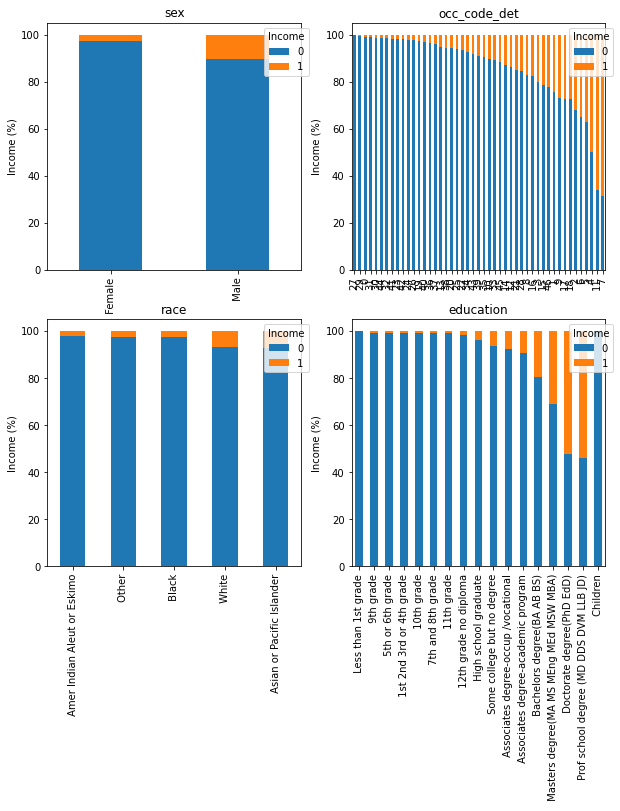

In [17]:
#| echo: false
n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))

for i, predictor in enumerate(categorical_predictors):
    ax = axs[i // n_cols, i % n_cols]
    grouped_data = data.groupby([predictor, 'income'])['income'].count().unstack()
    totals = grouped_data.sum(axis=1)
    percent_data = grouped_data.div(totals, axis=0) * 100
    sorted_percent_data = percent_data.sort_values(by=1, ascending=True)  # Sort by the value 1 (orange portion)
    sorted_percent_data.plot.bar(stacked=True, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Income (%)')
    ax.set_title(predictor)
    ax.legend(title='Income', loc='upper right', bbox_to_anchor=(1.05, 1))
    ax.tick_params(axis='both')
plt.show()

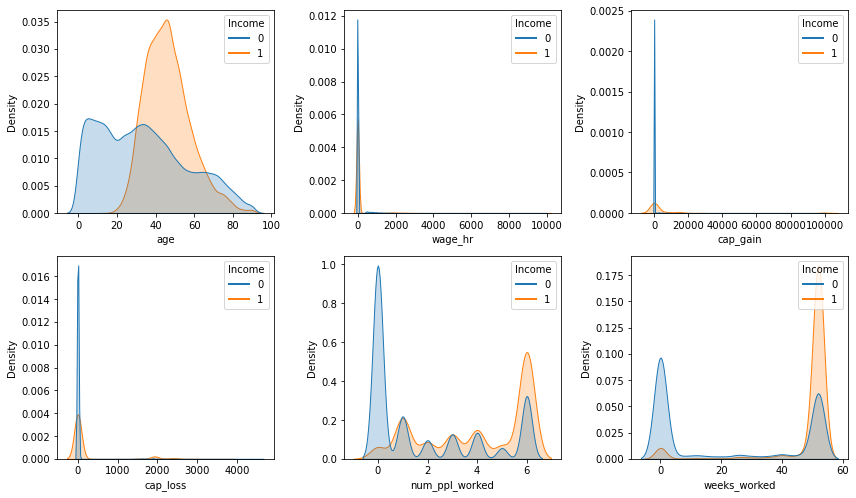

In [20]:
#| echo: false
from matplotlib.lines import Line2D
continuous_predictors = ['age','wage_hr','cap_gain', 'cap_loss','num_ppl_worked', 'weeks_worked']

n_rows = 3
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for j, predictor in enumerate(continuous_predictors):
    ax = axs[j // n_cols, j % n_cols]
    sns.kdeplot(data=data, x=predictor, hue='income', ax=ax, fill=True, common_norm=False)
    ax.set_xlabel(predictor)
    ax.set_ylabel('Density')
    legend_entries = []
    for income_value in data['income'].unique():
        legend_entry = Line2D([0],[0], color=sns.color_palette()[income_value], lw=2, label=income_value)
        legend_entries.append(legend_entry)
    ax.legend(handles=legend_entries, title='Income', loc='upper right')
for i in range(len(continuous_predictors), n_rows * n_cols):
    if isinstance(axs, np.ndarray):
        fig.delaxes(axs.flatten()[i])
    else:
        fig.delaxes(axs[i // n_cols, i % n_cols])
fig.tight_layout()
plt.show()

Insights from categorical variables:
- Male are on average richer compared to female
- There are racial disparities in income distribution
- The higher the educational level, the higher the annual income
- some industries are much more lucrative than others

Insights from continuous variables:
- age matters and the middle-aged population seems to be more productive and thus are more rich.
- financial investments might play a role, but both rich and poor people engage in investments. Need further investigation on this predictor.
- the more weeks you work, the more income you tend to get

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### MARS
*By Joseph Prette*

### Decision Trees with CCP & Random Forest
*By Chanel Sun*

Both the training set and test set exhibit severe data imbalance in the target variable ">50K." In the training set, there are 187,141 instances where the target is 0 and only 12,382 instances where the target is 1. Since tree-based models lack built-in mechanisms to handle imbalanced data, I employed the resample function from the sklearn library to randomly sample 8% of the data where the target variable is 0. I then combined this sampled data with the existing data that already had a target variable of 0. This approach helps to address the data imbalance and ensure a more representative training dataset for the tree-based models.

In [ ]:
# balance training data
from sklearn.utils import resample
train_0 = train[train['>50K'] == 0]
train_1 = train[train['>50K'] == 1]
sampled_train_0 = resample(train_0, n_samples=int(0.08 * len(train_0)), random_state=1)
train = pd.concat([sampled_train_0, train_1])

For feature engineering, I applied one-hot encoding to the categorical features and removed quasi-constant features that had 99% of the same value. These features tend to provide minimal useful information and can hinder the model's ability to generalize well. By eliminating them, I aimed to prevent overfitting, reduce model complexity, and improve computational efficiency. 284 features were removed from the dataset, while 189 features were retained for further analysis.

Next, I employed a decision tree model in two different ways. Next, I utilized a decision tree model in two different ways to address the issue of overfitting. Initially, I focused on tuning the hyperparameters, which included the number of leaf nodes, features, and depth of the tree. To identify the optimal parameter values, I performed two rounds of randomized search cross-validation. The decision tree model demonstrated promising performance on the training data, achieving an accuracy of 92.7% and a recall of 92.3%. However, the model did not generalize well to testing data, achieving an accuracy of 85.5% and a recall of 84.7% after threshold tuning. I tried including more hyperparameters like min_sample_splits after the initial grid search but that wasn’t able to resolve the issue. 

In [ ]:
# Course Grid 
param_grid = {    
    'max_depth': range(5,51,5),
    'max_leaf_nodes': range(5,3400,100),
    'max_features': range(10, 180, 10)
}
#  {'max_leaf_nodes': 905, 'max_features': 170, 'max_depth': 40}
#Finer Grid 
param_grid = {    
    'max_depth': range(38, 45,2),
    'max_leaf_nodes': range(900,910,2),
    'max_features': range(165, 175, 2)
}
# {'max_leaf_nodes': 908, 'max_features': 167, 'max_depth': 38}

To mitigate the overfitting issue, I decided to experiment with cost-complexity pruning (ccp) tuning. By adjusting the ccp parameter, I aimed to find the optimal trade-off between model complexity and performance. However, the model's generalization ability did not significantly improve. The model still suffers from a trade-off between variance and bias. On one hand, the decision tree model with ccp achieved a relatively lower training accuracy of 88.3% and a recall of 87.3%, indicating a reduction in overfitting but a higher bias compared to the initial model. On the other hand, the test accuracy of 86.4% and recall of 85% indicate that the model's ability to generalize to new data is still limited. This suggests that the model may not capture the underlying patterns and relationships in the data effectively. I tried decreasing the ccp value to reduce bias but the outcome was still not satisfactory. 

To further enhance the model's generalization ability and mitigate both variance and bias, I implemented random forests, again, through two rounds of randomized search cross-validation. I first removed the features with an importance less than 0.001. I tuned max_depth, max_leaf_nodes, max_features, and max_samples. I decreased n_estimators in finer grid search to reduce overfitting.  The model improved slightly in terms of both test and train accuracy, achieving 92.1% accuracy and 91.6% recall on training set and 87.8% accuracy and 85.9% recall on testing set. 

In [ ]:
#Course Grid
parameters = {'max_depth': range(5,51,5),
              'max_leaf_nodes': range(5,3400,100),
              'max_features': range(10, 180, 10), 
              'n_estimators': range(100, 501, 100),
             'max_samples':[0.25,0.5,0.75]}
# {'n_estimators': 400, 'max_samples': 0.5, 'max_leaf_nodes': 3205, 'max_features': 10, 'max_depth': 20}
# Finer Grid using n_estimators = 300
parameters = {'max_depth':range(18,23),
              'max_leaf_nodes':range(3200,3209,3),
              'max_features':range(8,12), 
             'max_samples':[0.45, 0.5, 0.55]}
# {'max_samples': 0.55, 'max_leaf_nodes': 3203, 'max_features': 8, 'max_depth': 19}

### AdaBoost
*By Jackson Bremen*

### XGBoost
*By Lucy Han*

- Before hyperparameter tuning, I developed a naive model used to compare performance before and after hyperparameter tuning.

In [ ]:
#First grid for RandomizedSearchCV
param_grid = {'max_depth': [4,6,8],
              'learning_rate': [0.001,0.01],
              'reg_lambda': [1,10,100],
              'n_estimators': [100],
              'gamma': [1,10,100],
              'subsample': [0.5,0.7,1],
              'colsample_bytree':[1],
              'scale_pos_weight': [15]}
Optimal parameter values = {'subsample': 1, 'scale_pos_weight': 15, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1}

- After getting the initial search results, I discovered that although the model returned decent results on the training dataset, it did poorly on the testing set, especially on recall. This is because the model is aggressively classifying most samples as 0s. Although the recall is much higher than the initial base model with the hyperparameter scale_pos_weight used to treat imbalanced data, more hyperparameters need to be tuned to achieve desirable results.
    - scale_pos_weight = (y_train.shape[0]-y_train.sum())/y_train.sum()
- I performed a finer grid search and decided to increase n_estimators since last model is underfitting. Then, I reduced parameter grid range to reduce running time. 
- I later tuned the decision threshold that optimizes training and testing performances.

In [ ]:
#Second grid for RandomizedSearchCV
param_grid = {'max_depth': [8],
              'learning_rate': [0.01,0.1],
              'reg_lambda': [1,10],
              'n_estimators': [500,800,1000],
              'gamma': [1,10],
              'subsample': [0.5],
              'colsample_bytree':[0.5],
              'scale_pos_weight': [15]}
Optimal parameter values = {'subsample': 0.5, 'scale_pos_weight': 15, 'reg_lambda': 10, 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 10, 'colsample_bytree': 0.5}

- Without heavy data preparation and feature selection, XGBoost is able to achieve a great result that balances bias and variance, achieving much higher recall than the base model (using logistic regression) and naive model (using XGBoost without hyperparameter tuning).

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

### Innovative ensembling methods
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Joseph Prette</td>
    <td>MARS</td>
    <td>123</td>    
    <td>123</td>
  </tr>
  <tr>
    <td>Chanel Sun</td>
    <td>Decision Tree with CCP & Random Forest</td>
    <td>Data Balancing  & Feature Engineering</td>    
    <td>Resampled data with target variable = 0; removed quasi-constant features with 99% of the same value</td>
  </tr>
    <tr>
    <td>Jackson Bremen</td>
    <td>AdaBoost</td>
    <td>123</td>    
    <td>123</td>
  </tr>
    <tr>
    <td>Lucy Han</td>
    <td>XGBoost</td>
    <td>Data cleaning & EDA</td>    
    <td>Cleaned and removed predictors with over 50% missing values; visualized predictor distribution against response for both categorical & continuous predictors</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.